In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

np.random.seed(0)

C:\Users\rtg90\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1-a

In [6]:
x_vector = np.random.normal(size = 100)
z_vector = np.random.normal(size = 100)

In [11]:
y_vector = 1.2 + (3*x_vector) - (8 * (x_vector**2)) + z_vector

n is 200 and p is 2. Y|X=x∼N(μY+ρσYσX(X−μX),σ2Y(1−ρ2))

# 1-b

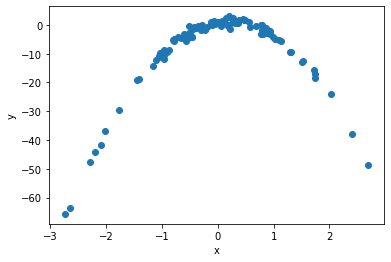

In [24]:
plt.scatter(x_vector, y_vector)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

The plot looks like a normal distribution curve with x centered at 0. y values range from about 0 to -70. It's probably because x is randomly sampled from the standard normal distribution and y is a transformation from it. 

# 1-c

In [135]:
lm = skl_lm.LinearRegression()
# i. y = β0 + β1x + ε, 
poly = PolynomialFeatures(degree=1)
loo = LeaveOneOut()
x = poly.fit_transform(x_vector.reshape(-1,1))
y = poly.fit_transform(y_vector.reshape(-1,1))

weights = np.polyfit(x_vector, y_vector, deg=1)
model = np.poly1d(weights)


loo.get_n_splits(x)

model_i = lm.fit(x, y)
#crossvalidation = KFold(n_splits=5, random_state=None, shuffle=False)
scores = cross_val_score(model_i, x, y, scoring="neg_mean_squared_error", cv=loo)


print("Degree: " + str(1) + ", MSE: " + str(np.mean(np.abs(scores))))
lm = skl_lm.LinearRegression()

#ii. y = β0 + β1x + β2x2 + ε, 
poly = PolynomialFeatures(degree=2)
loo = LeaveOneOut()
x = poly.fit_transform(x_vector.reshape(-1,1))
y = poly.fit_transform(y_vector.reshape(-1,1))

loo.get_n_splits(x)

model_ii = lm.fit(x, y)
#crossvalidation = KFold(n_splits=5, random_state=None, shuffle=False)
scores = cross_val_score(model_ii, x, y, scoring="neg_mean_squared_error", cv=loo)


print("Degree: " + str(2) + ", MSE: " + str(np.mean(np.abs(scores))))
lm = skl_lm.LinearRegression()

#iii. y = β0 + β1x + β2x2 + β3x3 + ε, 
poly = PolynomialFeatures(degree=3)
loo = LeaveOneOut()
x = poly.fit_transform(x_vector.reshape(-1,1))
y = poly.fit_transform(y_vector.reshape(-1,1))

loo.get_n_splits(x)

model_iii = lm.fit(x, y)
#crossvalidation = KFold(n_splits=5, random_state=None, shuffle=False)
scores = cross_val_score(model_iii, x, y, scoring="neg_mean_squared_error", cv=loo)


print("Degree: " + str(3) + ", MSE: " + str(np.mean(np.abs(scores))))
lm = skl_lm.LinearRegression()

#iv. y = β0 + β1x + β2x2 + β3x3 + β4x4 + ε
poly = PolynomialFeatures(degree=4)
loo = LeaveOneOut()
x = poly.fit_transform(x_vector.reshape(-1,1))
y = poly.fit_transform(y_vector.reshape(-1,1))

loo.get_n_splits(x)

model_iv = lm.fit(x, y)
#crossvalidation = KFold(n_splits=5, random_state=None, shuffle=False)
scores = cross_val_score(model_iv, x, y, scoring="neg_mean_squared_error", cv=loo)


print("Degree: " + str(4) + ", MSE: " + str(np.mean(np.abs(scores))))

Degree: 1, MSE: 92.38875072345024
Degree: 2, MSE: 26578.82617559277
Degree: 3, MSE: 135917655.16474134
Degree: 4, MSE: 84721477595.30247


# 1-d

The model i had the smallest LOOCV error. This is what I expected because model i has the smallest complexity (or the lowest polynomial degree). The model with the higher polynomial degree is likely to have the higher error rate because it's more complex. 

# 1-e

In [133]:
print("the coefficients of each model are:")
print("model_i:",model_i.coef_)
print("model_ii:",model_ii.coef_)
print("model_iii:",model_iii.coef_)
print("model_iv:",model_iv.coef_)


the coefficients of each model are:
model_i: [[0.        0.       ]
 [0.        4.7369653]]
model_ii: [[   0.            0.            0.        ]
 [   0.            3.11603659   -7.88520881]
 [   0.         -189.05432858  380.48522213]]
model_iii: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.18704382e+00 -7.89090333e+00 -2.02510622e-02]
 [ 0.00000000e+00  2.75669695e+00  3.65102660e+02 -5.47039650e+01]
 [ 0.00000000e+00 -5.36796140e+03 -1.86779975e+04  4.89935646e+03]]
model_iv: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  3.18721030e+00 -7.86590851e+00 -2.07615147e-02
  -4.21516445e-03]
 [ 0.00000000e+00  3.15399506e-01 -1.43335347e+00 -4.72184462e+01
   6.18131770e+01]
 [ 0.00000000e+00 -5.17414524e+03  1.04215310e+04  4.30507633e+03
  -4.90738764e+03]
 [ 0.00000000e+00  5.20196586e+05 -9.52005613e+05 -3.23912124e+05
   3.32107078e+05]]


Yes, the results agree with the conclusions drawn based on the cross-validation results. The statistical significance of coefficient estimates decreases as the polynomial degree increases. Thus, it makes sense that the model i with the lowest degree has the lowest LOOCV error rate.

# 2-a,b,c

In [2]:
default = pd.read_csv('C:\\Users\\rtg90\Downloads\\Default.csv', usecols = ['default', 'student', 'balance', 'income'])

In [3]:
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [6]:
x = default[['income', 'balance']]
y = default['default']

lr = LogisticRegression()
lr.fit(x, y)

In [7]:
#First testing
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.30, random_state=0)

lr = LogisticRegression()
lr.fit(x_train, y_train)

prob_arr = lr.predict_proba(x_val)

pred = []
for i in range(len(prob_arr)):
    if prob_arr[i][1] > 0.5:
        pred.append('Yes')
    else:
        pred.append('No')
        
cnt = 0
for i in range(len(pred)):
    if pred[i] != list(y_val)[i]:
        cnt += 1
print(cnt)

print("The validation error is:", cnt / len(pred))

C:\Users\rtg90\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


114
The validation error is: 0.038


In [8]:
#Second testing
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.30)

lr = LogisticRegression()
lr.fit(x_train, y_train)

prob_arr = lr.predict_proba(x_val)

pred = []
for i in range(len(prob_arr)):
    if prob_arr[i][1] > 0.5:
        pred.append('Yes')
    else:
        pred.append('No')
        
cnt = 0
for i in range(len(pred)):
    if pred[i] != list(y_val)[i]:
        cnt += 1
print(cnt)

print("The validation error is:", cnt / len(pred))

C:\Users\rtg90\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


117
The validation error is: 0.039


In [9]:
#third testing
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.30)

lr = LogisticRegression()
lr.fit(x_train, y_train)

prob_arr = lr.predict_proba(x_val)

pred = []
for i in range(len(prob_arr)):
    if prob_arr[i][1] > 0.5:
        pred.append('Yes')
    else:
        pred.append('No')
        
cnt = 0
for i in range(len(pred)):
    if pred[i] != list(y_val)[i]:
        cnt += 1
print(cnt)

print("The validation error is:", cnt / len(pred))

C:\Users\rtg90\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


99
The validation error is: 0.033


In [10]:
(0.038 + 0.039 + 0.033) /3 

0.03666666666666667

The three validation set error rates are 0.038, 0.039, and 0.033, respectively. This is a quite low error rate. The average validation error rate of all three trials is (0.038 + 0.039 + 0.033)/3 = 0.037. The logistic regression model seems to predict the default well. 

# 2-d

In [11]:
default_edit = pd.concat([default, default['student'].str.get_dummies()], axis = 1)

In [12]:
default_edit.head()

,default,student,balance,income,No,Yes
0,No,No,729.526495,44361.62507,1,0
1,No,Yes,817.180407,12106.13470,0,1
2,No,No,1073.549164,31767.13895,1,0
3,No,No,529.250605,35704.49394,1,0
4,No,No,785.655883,38463.49588,1,0


In [13]:
x_d = default_edit[['income', 'balance', 'No', 'Yes']]
y_d = default_edit['default']
x_d.head()

,income,balance,No,Yes
0,44361.62507,729.526495,1,0
1,12106.13470,817.180407,0,1
2,31767.13895,1073.549164,1,0
3,35704.49394,529.250605,1,0
4,38463.49588,785.655883,1,0


In [14]:
#First testing
x_train, x_val, y_train, y_val = train_test_split(x_d, y_d, test_size=0.30, random_state = 0)

lr = LogisticRegression()
lr.fit(x_train, y_train)

prob_arr = lr.predict_proba(x_val)

pred = []
for i in range(len(prob_arr)):
    if prob_arr[i][1] > 0.5:
        pred.append('Yes')
    else:
        pred.append('No')
        
cnt = 0
for i in range(len(pred)):
    if pred[i] != list(y_val)[i]:
        cnt += 1
print(cnt)

print("The validation error is:", cnt / len(pred))

C:\Users\rtg90\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


114
The validation error is: 0.038


In [15]:
#second testing
x_train, x_val, y_train, y_val = train_test_split(x_d, y_d, test_size=0.30)

lr = LogisticRegression()
lr.fit(x_train, y_train)

prob_arr = lr.predict_proba(x_val)

pred = []
for i in range(len(prob_arr)):
    if prob_arr[i][1] > 0.5:
        pred.append('Yes')
    else:
        pred.append('No')
        
cnt = 0
for i in range(len(pred)):
    if pred[i] != list(y_val)[i]:
        cnt += 1
print(cnt)

print("The validation error is:", cnt / len(pred))

C:\Users\rtg90\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


102
The validation error is: 0.034


In [16]:
#third testing
x_train, x_val, y_train, y_val = train_test_split(x_d, y_d, test_size=0.30)

lr = LogisticRegression()
lr.fit(x_train, y_train)

prob_arr = lr.predict_proba(x_val)

pred = []
for i in range(len(prob_arr)):
    if prob_arr[i][1] > 0.5:
        pred.append('Yes')
    else:
        pred.append('No')
        
cnt = 0
for i in range(len(pred)):
    if pred[i] != list(y_val)[i]:
        cnt += 1
print(cnt)

print("The validation error is:", cnt / len(pred))

C:\Users\rtg90\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


112
The validation error is: 0.037333333333333336


In [17]:
(0.038 + 0.034 + 0.037)/3

0.036333333333333336

The three validation set error rates are 0.038, 0.034, and 0.037, respectively. The average of the three validation error rates is: (0.038 + 0.034 + 0.037) / 3 = 0.036. I have a very close validation error rate as not including the dummy variable for student. Especially, when I set the same value for random_state = 0 when spliting the dataset, the validation error rate was exactly the same (0.038). Thus, including a dummy variable for student does not seem to significantly reduce the test error rate. 